In [1]:
#script writen by Chuck 
import uproot
import numpy as np
from matplotlib import pyplot as plt
from os import path

In [2]:
#Open ROOT file
file_path = "/Users/bertabeltran/muon_data/data/DShaped/DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1/FILTERED/SDataF_DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1.root"
file=uproot.open(file_path)
tree=file["Data_F"]
print(tree.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps = tree["Timestamp"].array(library = "np") # picoseconds
channel = tree["Channel"].array(library = "np")
energy = tree["Energy"].array(library = "np")
flags = tree["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags']


In [3]:
timestamps 

array([     403377515952,      403377516936,      552654054827, ...,
       16731467716705312, 16731560761697179, 16731560761697781],
      dtype=uint64)

In [4]:
#Create masks for channels
CH0_mask = channel == 0
CH1_mask = channel == 1


#Get timestamps for each channel
CH0_timestamps = timestamps[CH0_mask]
CH1_timestamps = timestamps[CH1_mask]


#Calculate energy of events on each channel
CH0_energy = energy[CH0_mask]
CH1_energy = energy[CH1_mask]

#Calculate time differences between events
CH0_time_diff = np.diff(CH0_timestamps)
CH1_time_diff = np.diff(CH1_timestamps)

In [5]:
CH0_timestamps

array([     403377516936,      552654055030,      552957576014, ...,
       16731435049902694, 16731467716702124, 16731560761697179],
      dtype=uint64)

In [6]:
CH1_timestamps

array([     403377515952,      552654054827,      552957574742, ...,
       16731435049903718, 16731467716705312, 16731560761697781],
      dtype=uint64)

In [7]:
len(CH0_timestamps)

80080

In [8]:
len(CH1_timestamps)

80080

In [21]:
16731560761697179-16731560761697781

-602

In [9]:
#Ch0ch1_time_diff = CH0_timestamps.astype(float)-CH1_timestamps.astype(float)
Ch0ch1_time_diff = CH0_timestamps-CH1_timestamps

In [22]:
len(Ch0ch1_time_diff)

80080

In [23]:
Ch0ch1_time_diff

array([                 984,                  203,                 1272,
       ..., 18446744073709550592, 18446744073709548428,
       18446744073709551014], dtype=uint64)

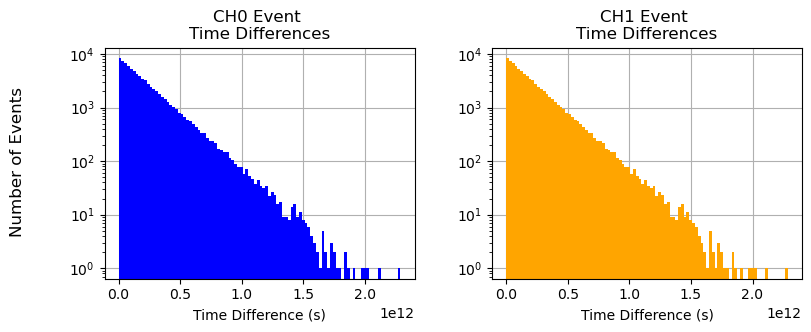

In [12]:
#Create plots
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(9,3))
fig.supylabel('Number of Events')
plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 100 
x_label = "Time Difference (s)"

#Add grid
ax0.grid(show_grid)
ax0.set_axisbelow(True)
ax1.grid(show_grid)
ax1.set_axisbelow(True)


# Plot data for channel 0
plt.sca(ax0)
ax0.set_title("CH0 Event \nTime Differences")
ax0.set_xlabel(x_label)
ax0.hist(CH0_time_diff, bins = bin_num, histtype='stepfilled' , color ='blue')
plt.yscale('log')

#Plot data for channel 1
plt.sca(ax1)
ax1.set_title("CH1 Event \nTime Differences")
ax1.set_xlabel(x_label)
ax1.hist(CH1_time_diff, bins = bin_num, histtype='stepfilled' , color ='orange')
plt.yscale('log')


plt.show()


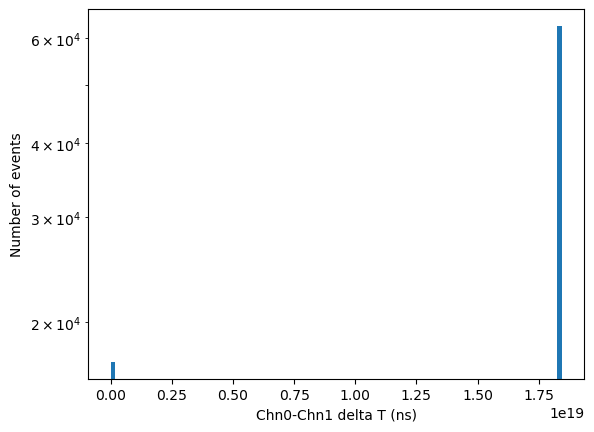

In [13]:
plt.hist(Ch0ch1_time_diff, bins=100)
plt.yscale('log')
#fig.suptitle('test title')
plt.xlabel('Chn0-Chn1 delta T (ns)')
plt.ylabel('Number of events')
fig.savefig('/Users/bertabeltran/muon_data/data/DShaped/deltaT.png')
plt.show()

In [14]:
#Create energy plots

#Create mask for events with time difference greater than 10s
CH0_energy_mask = CH0_time_diff>10
CH1_energy_mask = CH1_time_diff>10

#Remove last event from energies so that mask works
Energy_len = len(CH0_energy)
CH0_energy = CH0_energy[0:Energy_len-1]
CH1_energy = CH1_energy[0:Energy_len-1]

CH0_culled_energies = CH0_energy[CH0_energy_mask]
CH1_culled_energies = CH1_energy[CH1_energy_mask]



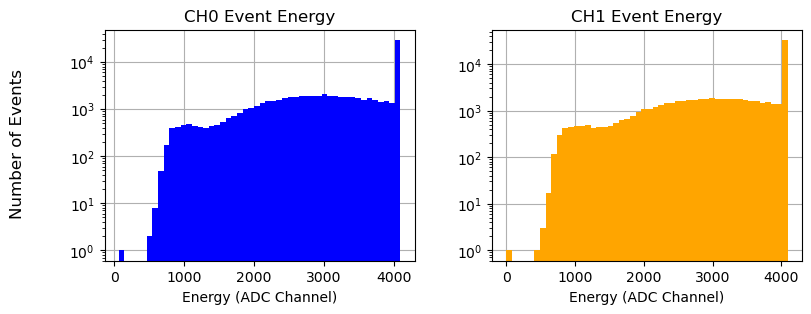

In [15]:
#Create plots
fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(9,3))
fig2.supylabel('Number of Events')
plt.figure(fig2.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 50
x_label = "Energy (ADC Channel)"

#Add grid
ax2.grid(show_grid)
ax2.set_axisbelow(True)
ax3.grid(show_grid)
ax3.set_axisbelow(True)


# Plot data for channel 0
plt.sca(ax2)
ax2.set_title("CH0 Event Energy")
ax2.set_xlabel(x_label)
ax2.hist(CH0_energy, bins = bin_num, color ='blue')
plt.yscale('log')

#Plot data for channel 1
plt.sca(ax3)
ax3.set_title("CH1 Event Energy")
ax3.set_xlabel(x_label)
ax3.hist(CH1_energy, bins = bin_num, color ='orange')
plt.yscale('log')

plt.show()